<a href="https://colab.research.google.com/github/Anwe20/Anwe20/blob/main/Final_Project_OGTIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data_loan_train=pd.read_csv("C:/Users/Anwesha Mishra/Downloads/Loan_data/Loan_data/train_v2.csv/train_v2.csv")
data_loan_test=pd.read_csv("C:/Users/Anwesha Mishra/Downloads/Loan_data/Loan_data/test_v2.csv/test_v2.csv")

C:\Users\Anwesha Mishra\AppData\Local\Temp\ipykernel_24412\3249914595.py:2: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  data_loan_train=pd.read_csv("C:/Users/Anwesha Mishra/Downloads/Loan_data/Loan_data/train_v2.csv/train_v2.csv")
C:\Users\Anwesha Mishra\AppData\Local\Temp\ipykernel_24412\3249914595.py:3: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  data_loan_test=pd.read_csv("C:/Users/Anwesha Mishra/Downloads/Loan_data/Loan_data/test_v2.csv/test_v2.csv")


In [ ]:
#f776=loan or not, #f777=fraud or not (the loan can be fraud), these numbers are a result of machine learning technique in order to protect financial information of customers
data_loan_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [ ]:
data_loan_test.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,...,-8.71,19,3.30,-9.37,0.50,0.0539,-1.0733,0,1,1079
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,...,-13.26,24,9.53,-7.55,6.22,0.3030,0.6087,0,1,36
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,...,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,...,-16.83,11,0.26,-5.31,0.78,0.2826,-0.7711,0,0,394
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,...,-20.00,10,13.55,-0.61,0.01,0.1815,-1.0843,0,0,23


In [ ]:
#check for missing values
data_loan_train.isnull().sum()

id         0
f1         0
f2         0
f3         0
f4         0
        ... 
f775    1525
f776       0
f777       0
f778       0
loss       0
Length: 771, dtype: int64

In [ ]:
data_loan_test.isnull().sum()

id         0
f1         0
f2         0
f3         0
f4         0
        ... 
f774    2066
f775    2960
f776       0
f777       0
f778       0
Length: 770, dtype: int64

In [ ]:
#drop missing values
data_loan_tr=data_loan_train.dropna()
data_loan_te=data_loan_test.dropna()

In [ ]:
data_loan_tr.isnull().sum()

id      0
f1      0
f2      0
f3      0
f4      0
       ..
f775    0
f776    0
f777    0
f778    0
loss    0
Length: 771, dtype: int64

In [ ]:
data_loan_te.isnull().sum()

id      0
f1      0
f2      0
f3      0
f4      0
       ..
f774    0
f775    0
f776    0
f777    0
f778    0
Length: 770, dtype: int64

In [ ]:
number = data_loan_tr.f777.value_counts()
legal = number[0]
fraud = number[1]
legal_perc = (legal/(legal+fraud))*100
fraud_perc = (fraud/(legal+fraud))*100
print("There were {} legal transactions ({:.2f}%) and {} fraud transactions ({:.2f}%).".format(legal, legal_perc, fraud, fraud_perc))

There were 37924 legal transactions (73.02%) and 14016 fraud transactions (26.98%).


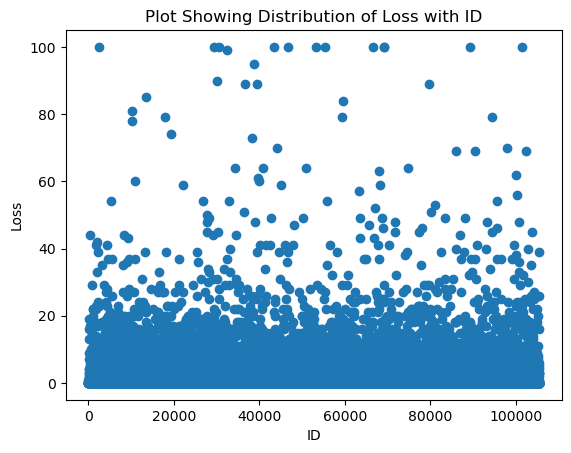

In [ ]:
plt.scatter(data_loan_tr['id'], data_loan_tr['loss'])
plt.xlabel('ID')
plt.ylabel('Loss')
plt.title('Plot Showing Distribution of Loss with ID')
plt.show()

In [ ]:
#combine datasets for train_test_split using sklearn
df = pd.concat([data_loan_te, data_loan_tr])

In [ ]:
data=df.dropna()

In [ ]:
#split the dataset into X and y for train test split
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    X = df.iloc[:, 2:30].values #select a few columns
    y = df.f777.values #fraud or not
    return X, y

In [ ]:
# Create X and y from the prep_data function
X, y = prep_data(data)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predicted = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.9708487163573869

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predicted = model_log.predict(X_test)
r2_score(y_test, predicted)
#linear regression is better than logistic regression

0.8677122542888531

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(max_depth=2, random_state=0)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
predicted = model_rfc.predict(X_test)
r2_score(y_test, predicted)

0.9850331382589578

In [ ]:
#standardise data
mean = np.mean(X_train)
std = np.std(X_train)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

In [ ]:
#create neural network
from keras import models, layers
model = models.Sequential() #sequential neural network
model.add(layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.add(layers.Dense(6, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from sklearn.metrics import classification_report

model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [ ]:
from sklearn.metrics import classification_report

model.compile(optimizer='rmsprop', loss='KLDivergence')
#different loss functions like KLDivergence and Poisson give higher loss values

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
650/650 [==============================] - 4s 3ms/step - loss: 0.0296
Epoch 2/10
650/650 [==============================] - 2s 3ms/step - loss: 1.5521e-04
Epoch 3/10
650/650 [==============================] - 2s 3ms/step - loss: 4.5225e-05
Epoch 4/10
650/650 [==============================] - 2s 3ms/step - loss: 2.6598e-05
Epoch 5/10
650/650 [==============================] - 2s 3ms/step - loss: 1.8703e-05
Epoch 6/10
650/650 [==============================] - 2s 4ms/step - loss: 1.4310e-05
Epoch 7/10
650/650 [==============================] - 2s 4ms/step - loss: 1.1510e-05
Epoch 8/10
650/650 [==============================] - 2s 3ms/step - loss: 9.5718e-06
Epoch 9/10
650/650 [==============================] - 2s 3ms/step - loss: 8.1466e-06
Epoch 10/10
650/650 [==============================] - 2s 3ms/step - loss: 7.0557e-06


In [ ]:
test_predictions = model.predict(X_test)
test_predictions

325/325 [==============================] - 1s 3ms/step


array([[0.9999654 ],
       [0.99996614],
       [0.99996144],
       ...,
       [0.99997133],
       [0.99996996],
       [0.99996245]], dtype=float32)

In [ ]:
pred = np.around(test_predictions)
pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7531
           1       0.28      1.00      0.43      2857

    accuracy                           0.28     10388
   macro avg       0.14      0.50      0.22     10388
weighted avg       0.08      0.28      0.12     10388



C:\Users\Anwesha Mishra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anwesha Mishra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anwesha Mishra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
